### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Administrator\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('insurance_part2_data.csv')

In [3]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [6]:
df.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


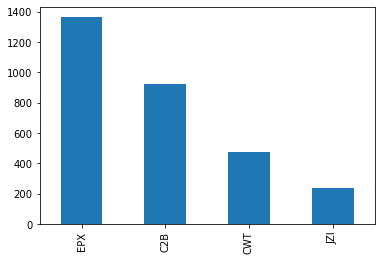

In [7]:
# let us view the unique categories among each object variables adn visualize for better understanding

print(df['Agency_Code'].value_counts())
df['Agency_Code'].value_counts().plot(kind='bar');

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


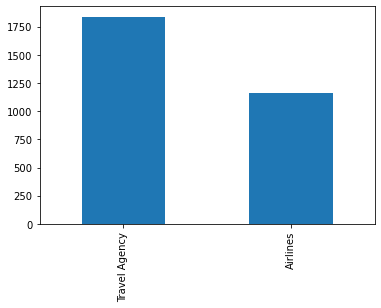

In [8]:
print(df['Type'].value_counts())
df['Type'].value_counts().plot(kind= 'bar');

No     2076
Yes     924
Name: Claimed, dtype: int64


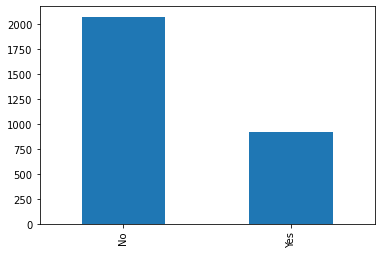

In [9]:
print(df['Claimed'].value_counts())
df['Claimed'].value_counts().plot(kind= 'bar');

Online     2954
Offline      46
Name: Channel, dtype: int64


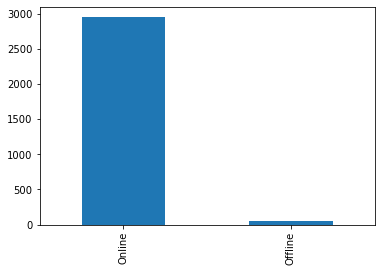

In [10]:
print(df['Channel'].value_counts())
df['Channel'].value_counts().plot(kind='bar');

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


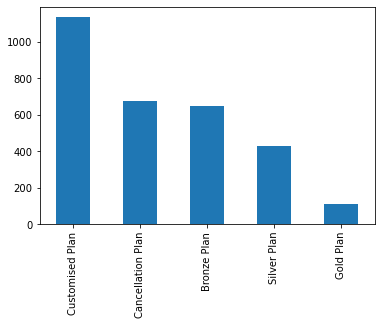

In [11]:
print(df['Product Name'].value_counts())
df['Product Name'].value_counts().plot(kind='bar');

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


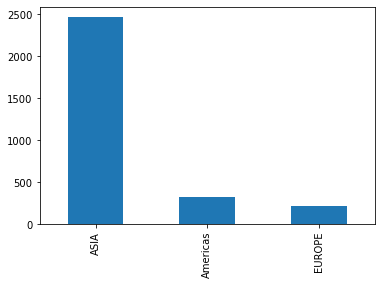

In [12]:
print(df['Destination'].value_counts())
df['Destination'].value_counts().plot(kind='bar');

Upon visualizing each categorical variable we can clearly see lots of information provided by them

    - There are four tour firms and EPX tops the counts.
    - Most of the insurance type is Travel agency not Airline.
    - Comparing claimed and not claimed status, less number of claims have been approved.
    - Most claims are made through online.
    - Customized plan is the most opted insurance type followed by cancellation plan.
    - Asia is the top destiantion of the tourist.

In [13]:
# Converting categorical variable into numeric

for column in df[['Agency_Code', 'Type','Claimed','Channel', 'Product Name', 'Destination']]:
    if df[column].dtype == 'object':
        df[column] = pd.Categorical(df[column]).codes       

In [14]:
# let us check the converted varibale and it dtypes

df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Agency_Code,3000.0,1.306333,0.994060,0.0,0.0,2.00,2.000,3.00
Type,3000.0,0.612333,0.487299,0.0,0.0,1.00,1.000,1.00
Claimed,3000.0,0.308000,0.461744,0.0,0.0,0.00,1.000,1.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000.0,0.984667,0.122895,0.0,1.0,1.00,1.000,1.00
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00
Product Name,3000.0,1.661667,1.258726,0.0,1.0,2.00,2.000,4.00
Destination,3000.0,0.250000,0.575277,0.0,0.0,0.00,0.000,2.00


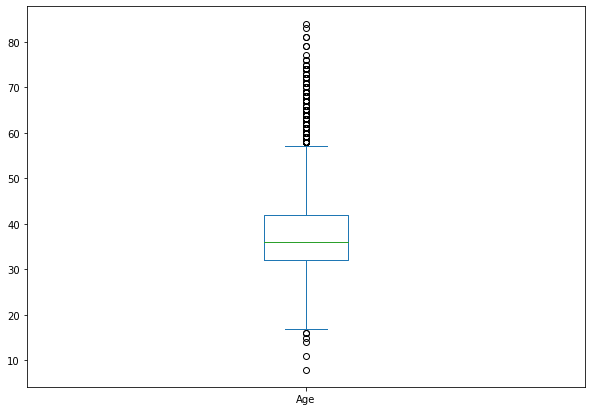

In [17]:
# Now let us explore the continuous variables
#cheking outliers
plt.figure(figsize=(10,7))
df['Age'].plot(kind='box');

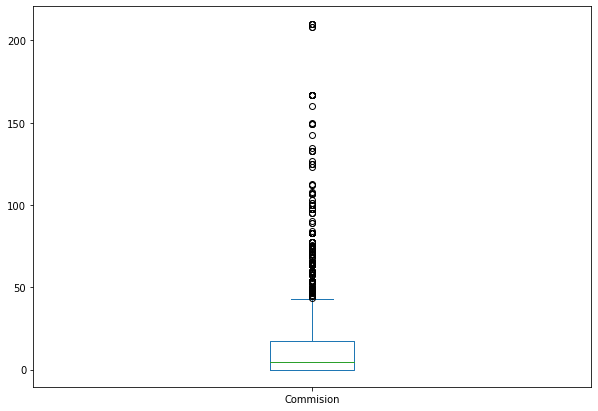

In [18]:
plt.figure(figsize=(10,7))
df['Commision'].plot(kind='box');

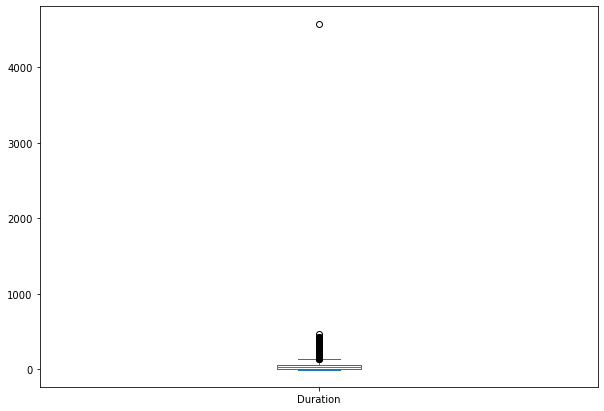

In [19]:
plt.figure(figsize=(10,7))
df['Duration'].plot(kind='box');

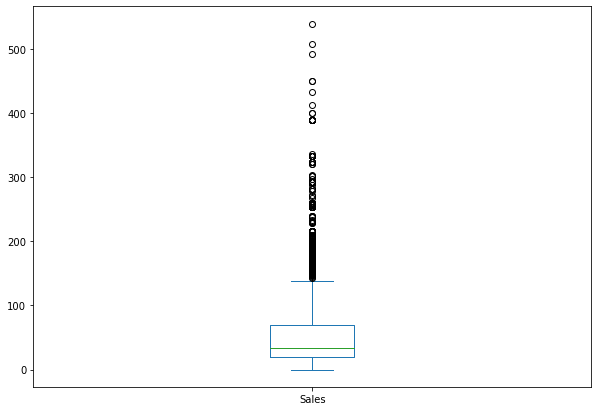

In [20]:
plt.figure(figsize=(10,7))
df['Sales'].plot(kind='box');

The plots above clearly shows that there are lots of outliers present in the continuous variables.

#### Treating Outliers

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1  
    lower_range = Q1 -(1.5*IQR)
    upper_range = Q3 +(1.5*IQR)
    return lower_range,upper_range

In [22]:
remove_outlier(df['Age'])

(17.0, 57.0)

In [23]:
df['Age'] = np.where(df['Age']> 57, df['Age'].median(), df['Age'])
df['Age'] = np.where(df['Age']< 17, df['Age'].median(), df['Age'])


<AxesSubplot:>

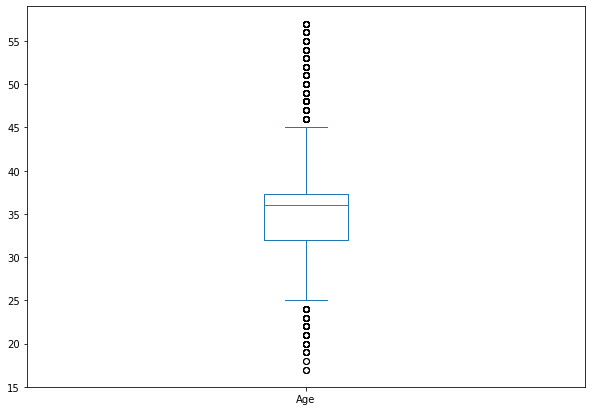

In [24]:
plt.figure(figsize=(10,7))
df['Age'].plot(kind='box')

In [25]:
remove_outlier(df['Commision'])

(-25.8525, 43.0875)

In [26]:
df['Commision'] = np.where(df['Commision']> 43.0875, df['Commision'].mean(), df['Commision'])
df['Commision'] = np.where(df['Commision']< -25.8525, df['Commision'].mean(), df['Commision'])

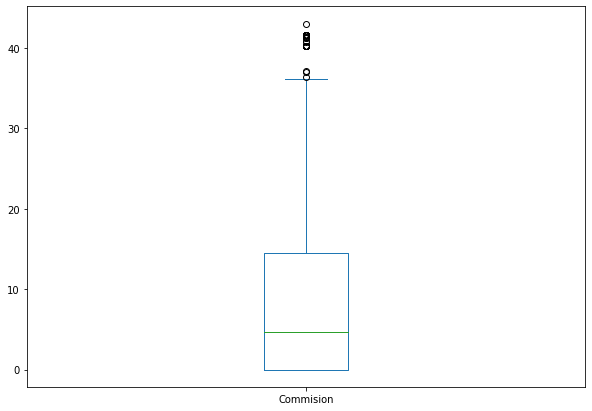

In [27]:
plt.figure(figsize=(10,7))
df['Commision'].plot(kind='box');

In [28]:
remove_outlier(df['Duration'])

(-67.0, 141.0)

In [29]:
df['Duration'] = np.where(df['Duration']> 141, df['Duration'].mean(), df['Duration'])
df['Duration'] = np.where(df['Duration']< -67, df['Duration'].mean(), df['Duration'])

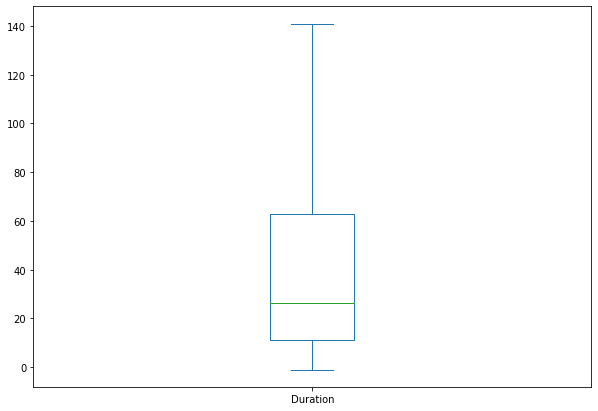

In [30]:
plt.figure(figsize=(10,7))
df['Duration'].plot(kind='box');

In [31]:
remove_outlier(df['Sales'])

(-53.5, 142.5)

In [32]:
df['Sales'] = np.where(df['Sales']> 142.5, df['Sales'].mean(), df['Sales'])
df['Sales'] = np.where(df['Sales']< -53.5, df['Sales'].mean(), df['Sales'])

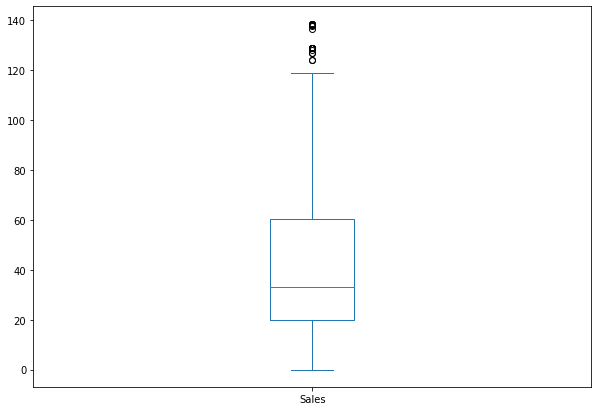

In [33]:
plt.figure(figsize=(10,7))
df['Sales'].plot(kind='box');

Now, we see that the outliers in the numeric variables has been reduced.

In [34]:
#checking for correlation among the variables
corr = df.corr()
corr

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
Age,1.000000,0.067907,-0.005330,-0.069237,0.013340,0.022018,-0.001701,-0.018516,0.020431,0.033350
Agency_Code,0.067907,1.000000,0.552247,-0.428647,-0.444018,0.022085,-0.065023,-0.184405,-0.379233,0.092274
Type,-0.005330,0.552247,1.000000,-0.343505,-0.316265,-0.099291,-0.028994,-0.051872,-0.008416,0.317289
Claimed,-0.069237,-0.428647,-0.343505,1.000000,0.251171,-0.016641,0.155233,0.262351,0.257951,-0.023851
Commision,0.013340,-0.444018,-0.316265,0.251171,1.000000,0.000445,0.123756,0.377632,0.242530,0.193515
Channel,0.022018,0.022085,-0.099291,-0.016641,0.000445,1.000000,-0.050103,0.005174,-0.037859,0.035373
Duration,-0.001701,-0.065023,-0.028994,0.155233,0.123756,-0.050103,1.000000,0.285524,0.196823,0.114207
Sales,-0.018516,-0.184405,-0.051872,0.262351,0.377632,0.005174,0.285524,1.000000,0.304097,0.361091
Product Name,0.020431,-0.379233,-0.008416,0.257951,0.242530,-0.037859,0.196823,0.304097,1.000000,0.021528
Destination,0.033350,0.092274,0.317289,-0.023851,0.193515,0.035373,0.114207,0.361091,0.021528,1.000000


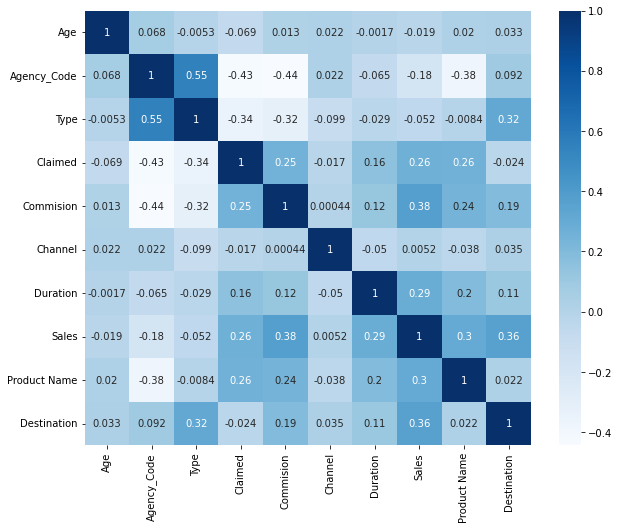

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap ='Blues');

We can conclude that there is no strong correlation between any of the variables present in the dataset

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [36]:
# import necessary packages
from sklearn.model_selection import train_test_split

In [37]:
x = df.drop('Claimed', axis=1)
y = df.pop('Claimed')


In [38]:
##Spliting the data into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3,random_state = 1)

In [39]:
# Checking dimensions on the train and test data

print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (2100, 9)
x_test:  (900, 9)
y_train:  (2100,)
y_test:  (900,)


#### Scaling the variables

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()

# Scaling the traing and test data
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

  #### Building ANN model

In [42]:
from sklearn.neural_network import MLPClassifier
nnclf = MLPClassifier(hidden_layer_sizes=500,max_iter=5000,solver="sgd",verbose=True,random_state=1,
                     tol = 0.01)

In [43]:
nnclf.fit(x_train,y_train)

Iteration 1, loss = 0.66815365
Iteration 2, loss = 0.64825642
Iteration 3, loss = 0.62614675
Iteration 4, loss = 0.60531986
Iteration 5, loss = 0.58824747
Iteration 6, loss = 0.57429711
Iteration 7, loss = 0.56237073
Iteration 8, loss = 0.55240826
Iteration 9, loss = 0.54368760
Iteration 10, loss = 0.53636152
Iteration 11, loss = 0.52989460
Iteration 12, loss = 0.52452192
Iteration 13, loss = 0.51955822
Iteration 14, loss = 0.51522522
Iteration 15, loss = 0.51139715
Iteration 16, loss = 0.50814484
Iteration 17, loss = 0.50500359
Iteration 18, loss = 0.50235546
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=500, max_iter=5000, random_state=1,
              solver='sgd', tol=0.01, verbose=True)

In [44]:
y_train_pred = nnclf.predict(x_train)

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train,y_train_pred)

array([[1376,   95],
       [ 390,  239]], dtype=int64)

In [46]:
nnclf.score(x_train,y_train)

0.7690476190476191

In [47]:
y_train_pred = nnclf.predict(x_train)

In [48]:
### Predicting for the test data and evaluating the performmnace

y_pred_test = nnclf.predict(x_test)

In [49]:
confusion_matrix(y_test,y_pred_test)

array([[571,  34],
       [202,  93]], dtype=int64)

In [50]:
nnclf.score(x_test,y_test)

0.7377777777777778

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "hidden_layer_sizes":[100,200,300,500],
    "max_iter":[2500,3000,7000],
    "solver":["sgd","adam"],
    "tol":[0.01]
}

In [52]:
nnclfgds = MLPClassifier(random_state=5)
grid_search = GridSearchCV(estimator=nnclfgds,param_grid=param_grid,cv=10)

In [53]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=5),
             param_grid={'hidden_layer_sizes': [100, 200, 300, 500],
                         'max_iter': [2500, 3000, 7000],
                         'solver': ['sgd', 'adam'], 'tol': [0.01]})

In [54]:
grid_search.best_params_

{'hidden_layer_sizes': 500, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [55]:
best_grid = grid_search.best_estimator_

In [56]:
best_grid

MLPClassifier(hidden_layer_sizes=500, max_iter=2500, random_state=5, tol=0.01)

In [57]:
nnclf = MLPClassifier(hidden_layer_sizes=500,max_iter=2500,solver="adam",verbose=True,random_state=5,
                     tol = 0.01)

In [58]:
nnclf.fit(x_train,y_train)

Iteration 1, loss = 0.65539956
Iteration 2, loss = 0.52626681
Iteration 3, loss = 0.48356388
Iteration 4, loss = 0.47455527
Iteration 5, loss = 0.47092165
Iteration 6, loss = 0.46962416
Iteration 7, loss = 0.46729607
Iteration 8, loss = 0.46584411
Iteration 9, loss = 0.46431590
Iteration 10, loss = 0.46355682
Iteration 11, loss = 0.46215791
Iteration 12, loss = 0.46150519
Iteration 13, loss = 0.46053724
Iteration 14, loss = 0.45933236
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=500, max_iter=2500, random_state=5, tol=0.01,
              verbose=True)

In [59]:
y_train_pred = nnclf.predict(x_train)

In [60]:
confusion_matrix(y_train,y_train_pred)

array([[1313,  158],
       [ 299,  330]], dtype=int64)

In [61]:
nnclf.score(x_train, y_train)

0.7823809523809524

In [127]:
nnclf.score(x_test,y_test)

0.7633333333333333

As, we can see that even after changing the best parameter model performance didn't improve that great.

#### Decision Tree classifier

In [62]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [63]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [64]:
grid_search_dtcl.fit(x_train, y_train)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [65]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = ['Age', 'Agency_Code', 'Type', 'Commision', 'Channel', 'Duration',
                                                 'Sales', 'Product Name', 'Destination'],
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://www.webgraphviz.com/?tab=map

Based on the graphviz, we can change various parameters such as max_depth and build a regularised decision tree model

In [66]:
reg_dtcl = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=50, min_samples_split=150)

In [67]:
reg_dtcl.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=150)

In [68]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dtcl, out_file= tree_regularized ,
                                feature_names = ['Age', 'Agency_Code', 'Type', 'Commision', 'Channel', 'Duration',
                                                 'Sales', 'Product Name', 'Destination'],
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://www.webgraphviz.com/?tab=map

In [69]:
reg_dtcl.feature_importances_

array([0.01890129, 0.62304008, 0.00770847, 0.01317639, 0.        ,
       0.02152713, 0.25816261, 0.05748403, 0.        ])

In [70]:
print(pd.DataFrame(reg_dtcl.feature_importances_, columns = ["Importance"], index = ['Age', 'Agency_Code', 'Type', 'Commision', 'Channel', 'Duration',
                                                 'Sales', 'Product Name', 'Destination']))

              Importance
Age             0.018901
Agency_Code     0.623040
Type            0.007708
Commision       0.013176
Channel         0.000000
Duration        0.021527
Sales           0.258163
Product Name    0.057484
Destination     0.000000


In [71]:
ytrain_predict_dtcl = reg_dtcl.predict(x_train)
ytest_predict_dtcl = reg_dtcl.predict(x_test)

In [72]:
ytest_predict_dtcl
ytest_predict_dtcl_prob=best_grid.predict_proba(x_test)
ytest_predict_dtcl_prob
pd.DataFrame(ytest_predict_dtcl_prob).head()

,0,1
0,0.827206,0.172794
1,0.717811,0.282189
2,0.500347,0.499653
3,0.273151,0.726849
4,0.915778,0.084222


#### Random forest Classification

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rfcl = RandomForestClassifier(n_estimators=501, oob_score=True, max_depth=4, 
                              max_features=5, min_samples_leaf= 50, min_samples_split=120, random_state=1)

In [130]:
rfcl = rfcl.fit(x_train, y_train)

In [131]:
rfcl.oob_score_

0.7814285714285715

Looking at the oob score, the error rate is 22%.

In [132]:
rfcl = RandomForestClassifier(n_estimators=401, oob_score=True, max_depth=5, 
                              max_features=3, min_samples_leaf= 60, min_samples_split=180, random_state=1)

In [133]:
rfcl = rfcl.fit(x_train, y_train)

In [134]:
rfcl.oob_score_

0.7814285714285715

In [135]:
rfcl = RandomForestClassifier(n_estimators=601, oob_score=True, max_depth=7, 
                              max_features=7, min_samples_leaf= 30, min_samples_split=90, random_state=1)

In [136]:
rfcl = rfcl.fit(x_train, y_train)

In [137]:
rfcl.oob_score_

0.7866666666666666

After working on the parameters with different values, it is evident that there is no big change in the performance of the model.

In [138]:
# lets us use the gridsearch cv to find better parameter values

param_grid_rfcl = {
    'max_depth': [4,5],
    'max_features': [2,3],
    'min_samples_leaf': [5,10],
    'min_samples_split': [15,30],
    'n_estimators': [250,350] 
}


In [139]:
rfcl = RandomForestClassifier()

In [140]:
grid_search_rfcl = GridSearchCV(estimator=rfcl, param_grid=param_grid_rfcl, cv =2)

In [141]:
grid_search_rfcl.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5], 'max_features': [2, 3],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [15, 30],
                         'n_estimators': [250, 350]})

In [142]:
grid_search_rfcl.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 250}

In [143]:
grid_search_rfcl.best_estimator_

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       min_samples_split=15, n_estimators=250)

In [144]:
rfcl = RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=10,
                       min_samples_split=15, n_estimators=250, random_state =1)


In [145]:
rfcl.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=10,
                       min_samples_split=15, n_estimators=250, random_state=1)

In [146]:
y_train_predict_rfcl = rfcl.predict(x_train)
y_test_predict_rfcl = rfcl.predict(x_test)
y_train_predict_rfcl

array([0, 0, 1, ..., 0, 0, 1], dtype=int8)

In [164]:
rfcl.feature_importances_

array([0.04725414, 0.28564471, 0.0785789 , 0.13165146, 0.00110345,
       0.05519986, 0.15955682, 0.23098013, 0.01003052])

In [165]:
print(pd.DataFrame(rfcl.feature_importances_, columns = ["Importance"], index = ['Age', 'Agency_Code', 'Type', 'Commision', 'Channel', 'Duration',
                                                 'Sales', 'Product Name', 'Destination']))

              Importance
Age             0.047254
Agency_Code     0.285645
Type            0.078579
Commision       0.131651
Channel         0.001103
Duration        0.055200
Sales           0.159557
Product Name    0.230980
Destination     0.010031


### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

#### ANN

In [92]:
# First, let us import all the necessary packages

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

##### Let us evaluate model performs on training data first and then the test data 

In [93]:
nnclf.fit(x_train, y_train)

Iteration 1, loss = 0.65539956
Iteration 2, loss = 0.52626681
Iteration 3, loss = 0.48356388
Iteration 4, loss = 0.47455527
Iteration 5, loss = 0.47092165
Iteration 6, loss = 0.46962416
Iteration 7, loss = 0.46729607
Iteration 8, loss = 0.46584411
Iteration 9, loss = 0.46431590
Iteration 10, loss = 0.46355682
Iteration 11, loss = 0.46215791
Iteration 12, loss = 0.46150519
Iteration 13, loss = 0.46053724
Iteration 14, loss = 0.45933236
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=500, max_iter=2500, random_state=5, tol=0.01,
              verbose=True)

In [94]:
y_train_predict_nnclf = nnclf.predict(x_train)

In [95]:
nnclf.score(x_train,y_train)

0.7823809523809524

In [96]:
#confusion matrix for the train data

cm_train_nnclf = confusion_matrix(y_train, y_train_predict_nnclf)
print(cm_train_nnclf)

[[1313  158]
 [ 299  330]]


Accuracy for ANN model is 
 0.7823809523809524


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1471
           1       0.68      0.52      0.59       629

    accuracy                           0.78      2100
   macro avg       0.75      0.71      0.72      2100
weighted avg       0.77      0.78      0.77      2100



Confusion Matrix for ANN model is


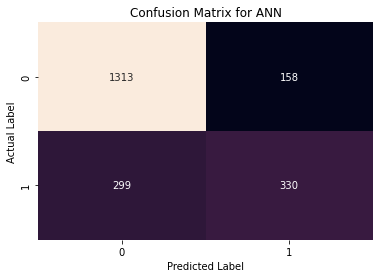

In [97]:
models_names={nnclf:'ANN'}

print('Accuracy for {} model is'.format(models_names[nnclf]),'\n',accuracy_score(y_train,y_train_predict_nnclf))
print('\n')
print('Classification report for {} model is'.format(models_names[nnclf]),'\n',classification_report(y_train,y_train_predict_nnclf))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[nnclf]))
sns.heatmap(cm_train_nnclf,annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[nnclf]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

AUC: 0.827


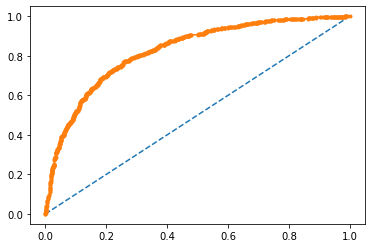

In [98]:
# let us see the roc curve and the roc_auc_score for train data

# predict probabilities
probs = nnclf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_train_ann = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_ann)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Let us look at how the ANN model performs on test data

In [99]:
y_test_predict_nnclf = nnclf.predict(x_test)

In [100]:
nnclf.score(x_test,y_test)

0.7633333333333333

In [101]:
#confusion matrix for the test data

cm_test_nnclf = confusion_matrix(y_test, y_test_predict_nnclf)
print(cm_test_nnclf)

[[556  49]
 [164 131]]


Accuracy for ANN model is 
 0.7633333333333333


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.73      0.44      0.55       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.70       900
weighted avg       0.76      0.76      0.74       900



Confusion Matrix for ANN model is


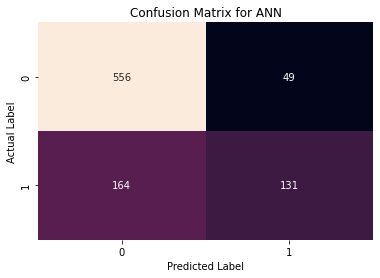

In [102]:
models_names={nnclf:'ANN'}

print('Accuracy for {} model is'.format(models_names[nnclf]),'\n',accuracy_score(y_test,y_test_predict_nnclf))
print('\n')
print('Classification report for {} model is'.format(models_names[nnclf]),'\n',classification_report(y_test,y_test_predict_nnclf))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[nnclf]))
sns.heatmap(cm_test_nnclf,annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[nnclf]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

AUC: 0.809


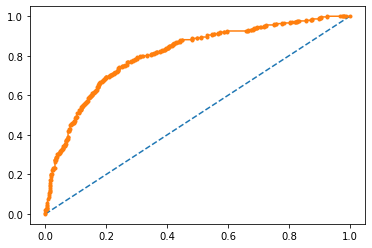

In [103]:
# let us see the roc curve and the roc_auc_score for test data

# predict probabilities
probs = nnclf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_test_ann = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_ann)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

##### Decision Tree

In [104]:
dtcl.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [105]:
y_train_predict_dtcl = dtcl.predict(x_train)

In [106]:
dtcl.score(x_train,y_train)

0.9828571428571429

In [107]:
#confusion matrix for the train data

cm_train_dtcl = confusion_matrix(y_train, y_train_predict_dtcl)
print(cm_train_dtcl)

[[1453   18]
 [  18  611]]


Accuracy for DECISION TREE CLASSIFIER model is 
 0.9828571428571429


Classification report for DECISION TREE CLASSIFIER model is 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1471
           1       0.97      0.97      0.97       629

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



Confusion Matrix for DECISION TREE CLASSIFIER model is


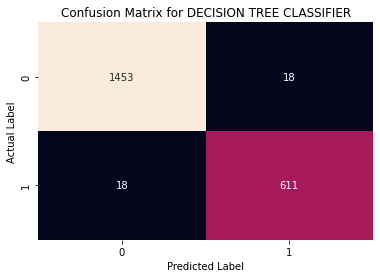

In [108]:
models_names={dtcl:'DECISION TREE CLASSIFIER'}

print('Accuracy for {} model is'.format(models_names[dtcl]),'\n',accuracy_score(y_train,y_train_predict_dtcl))
print('\n')
print('Classification report for {} model is'.format(models_names[dtcl]),'\n',classification_report(y_train,y_train_predict_dtcl))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[dtcl]))
sns.heatmap(cm_train_dtcl,annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dtcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

AUC: 0.827


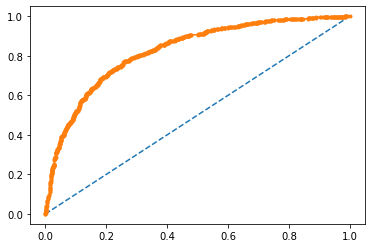

In [109]:
# let us see the roc curve and the roc_auc_score for train data

# predict probabilities
probs = nnclf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_train_dtcl = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_dtcl)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Let us look at how the Decision tree model performs on test data

In [147]:
y_test_predict_dtcl = dtcl.predict(x_test)

In [148]:
dtcl.score(x_test, y_test)

0.7011111111111111

In [149]:
#confusion matrix for the test data

cm_test_dtcl = confusion_matrix(y_test, y_test_predict_dtcl)
print(cm_test_dtcl)

[[488 117]
 [152 143]]


Accuracy for DECISION TREE CLASSIFIER model is 
 0.7011111111111111


Classification report for DECISION TREE CLASSIFIER model is 
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       605
           1       0.55      0.48      0.52       295

    accuracy                           0.70       900
   macro avg       0.66      0.65      0.65       900
weighted avg       0.69      0.70      0.70       900



Confusion Matrix for DECISION TREE CLASSIFIER model is


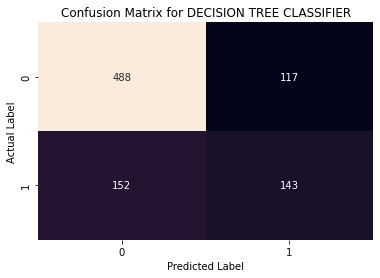

In [150]:
models_names={dtcl:'DECISION TREE CLASSIFIER'}

print('Accuracy for {} model is'.format(models_names[dtcl]),'\n',accuracy_score(y_test,y_test_predict_dtcl))
print('\n')
print('Classification report for {} model is'.format(models_names[dtcl]),'\n',classification_report(y_test,y_test_predict_dtcl))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[dtcl]))
sns.heatmap(cm_test_dtcl,annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dtcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

AUC: 0.809


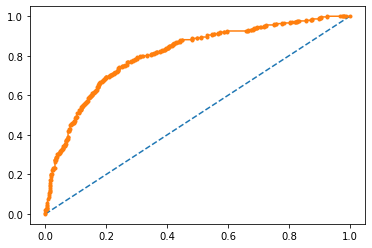

In [151]:
# let us see the roc curve and the roc_auc_score for test data

# predict probabilities
probs = nnclf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_test_dtcl = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_dtcl)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

##### Random Forest 

In [152]:
# since we have already predicted while modelling we can use that and check the performs of the model

# Starting with the train data

y_train_predict_rfcl = rfcl.predict(x_train)

In [153]:
rfcl.score(x_train, y_train)

0.8114285714285714

In [154]:
# confusion matrix for the training data

cm_train_rfcl = confusion_matrix(y_train, y_train_predict_rfcl)
print(cm_train_rfcl)

[[1328  143]
 [ 253  376]]


Accuracy for RANDOM FOREST CLASSIFIER model is 
 0.8114285714285714


Classification report for RANDOM FOREST CLASSIFIER model is 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.72      0.60      0.66       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.81      0.81      0.81      2100



Confusion Matrix for RANDOM FOREST CLASSIFIER model is


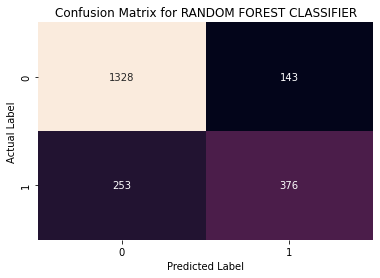

In [155]:
models_names={rfcl:'RANDOM FOREST CLASSIFIER'}

print('Accuracy for {} model is'.format(models_names[rfcl]),'\n',accuracy_score(y_train,y_train_predict_rfcl))
print('\n')
print('Classification report for {} model is'.format(models_names[rfcl]),'\n',classification_report(y_train,y_train_predict_rfcl))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[rfcl]))
sns.heatmap(cm_train_rfcl,annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

AUC: 0.847


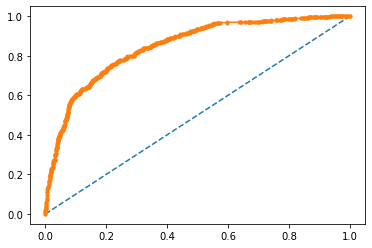

In [156]:
# let us see the roc curve and the roc_auc_score for training data

# predict probabilities
probs = rfcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_train_rfcl = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_rfcl)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Let us look at how the Random forest model performs on test data

In [157]:
y_test_predict = rfcl.predict(x_test)

In [158]:
rfcl.score(x_test, y_test)

0.7711111111111111

In [159]:
# confusion matrix for the training data

cm_test_rfcl = confusion_matrix(y_test, y_test_predict_rfcl)
print(cm_test_rfcl)

[[553  52]
 [154 141]]


Accuracy for RANDOM FOREST CLASSIFIER model is 
 0.7711111111111111


Classification report for RANDOM FOREST CLASSIFIER model is 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



Confusion Matrix for RANDOM FOREST CLASSIFIER model is


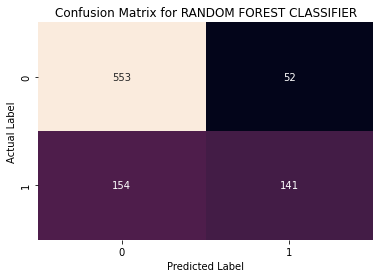

In [160]:
models_names={rfcl:'RANDOM FOREST CLASSIFIER'}

print('Accuracy for {} model is'.format(models_names[rfcl]),'\n',accuracy_score(y_test,y_test_predict_rfcl))
print('\n')
print('Classification report for {} model is'.format(models_names[rfcl]),'\n',classification_report(y_test,y_test_predict_rfcl))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[rfcl]))
sns.heatmap(cm_test_rfcl,annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

AUC: 0.816


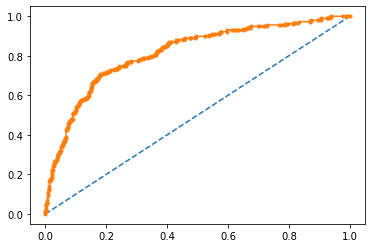

In [161]:
# let us see the roc curve and the roc_auc_score for test data

# predict probabilities
probs = rfcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_test_rfcl = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_rfcl)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [162]:
# Saving the values of classification report of all the model in each object for both train and test data, in order fit it into the dataframe for comparision

# Decision Tree(CART)

# for train data
cart_metrics=classification_report(y_train, y_train_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1_dtcl1=round(df.loc["1"][2],2)
cart_train_recall_dtcl1=round(df.loc["1"][1],2)
cart_train_precision_dtcl1=round(df.loc["1"][0],2)

# for test data
cart_metrics=classification_report(y_test, y_test_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision_dtcl2=round(df.loc["1"][0],2)
cart_test_recall_dtcl2=round(df.loc["1"][1],2)
cart_test_f1_dtcl2=round(df.loc["1"][2],2)

# Random Forest

# for train data

rfcl_metrics = classification_report(y_train, y_train_predict_rfcl,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
cart_train_f1_rfcl1=round(df.loc["1"][2],2)
cart_train_recall_rfcl1=round(df.loc["1"][1],2)
cart_train_precision_rfcl1=round(df.loc["1"][0],2)

# for test data

rfcl_metrics = classification_report(y_test, y_test_predict_rfcl,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
cart_train_f1_rfcl2=round(df.loc["1"][2],2)
cart_train_recall_rfcl2=round(df.loc["1"][1],2)
cart_train_precision_rfcl2=round(df.loc["1"][0],2)


# ANN 

# for train data

nnclf_metrics =classification_report(y_train, y_train_predict_nnclf,output_dict=True)
df=pd.DataFrame(nnclf_metrics).transpose()
cart_train_f1_nnclf1=round(df.loc["1"][2],2)
cart_train_recall_nnclf1=round(df.loc["1"][1],2)
cart_train_precision_nnclf1=round(df.loc["1"][0],2)


# for test data

nnclf_metrics =classification_report(y_test, y_test_predict_nnclf,output_dict=True)
df=pd.DataFrame(nnclf_metrics).transpose()
cart_train_f1_nnclf2=round(df.loc["1"][2],2)
cart_train_recall_nnclf2=round(df.loc["1"][1],2)
cart_train_precision_nnclf2=round(df.loc["1"][0],2)

In [163]:
index=['Accuracy', 'AUC','Precision', 'Recall', 'F1 Score']
                                                    
data = pd.DataFrame({'CART TRAIN' : [accuracy_score(y_train,y_train_predict_dtcl), auc_train_dtcl, cart_train_precision_dtcl1, 
                                     cart_train_f1_dtcl1, cart_train_recall_dtcl1],
                    'CART TEST' : [accuracy_score(y_test,y_test_predict_dtcl), auc_test_dtcl, 
                                  cart_test_precision_dtcl2, cart_test_recall_dtcl2, cart_test_f1_dtcl2],
                    'RF TRAIN' : [accuracy_score(y_train, y_train_predict_rfcl), auc_train_rfcl,
                                 cart_train_precision_rfcl1, cart_train_recall_rfcl1, cart_train_f1_rfcl1],
                    'RF TEST' : [accuracy_score(y_test, y_test_predict_rfcl), auc_test_rfcl,
                                cart_train_precision_rfcl2, cart_train_recall_rfcl2, cart_train_f1_rfcl2],
                    'ANN TRAIN' : [accuracy_score(y_train, y_train_predict_nnclf), auc_train_ann,
                                  cart_train_precision_nnclf1, cart_train_recall_nnclf1, cart_train_f1_nnclf1],
                    'ANN TEST': [accuracy_score(y_test, y_test_predict_nnclf), auc_test_ann,
                                cart_train_precision_nnclf2, cart_train_recall_nnclf2, cart_train_f1_nnclf2]}, index =index)

round(data,2)

,CART TRAIN,CART TEST,RF TRAIN,RF TEST,ANN TRAIN,ANN TEST
Accuracy,0.98,0.70,0.81,0.77,0.78,0.76
AUC,0.83,0.81,0.85,0.82,0.83,0.81
Precision,0.97,0.55,0.72,0.73,0.68,0.73
Recall,0.97,0.48,0.60,0.48,0.52,0.44
F1 Score,0.97,0.52,0.66,0.58,0.59,0.55
